In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = "/content/Job_Role_Prediction_Dataset_Before _EDA.csv"
data = pd.read_csv(file_path)

In [ ]:
print("\nShape of the dataset (rows, columns):")
print(data.shape)


Shape of the dataset (rows, columns):
(100, 10)


In [ ]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
  Candidate ID             Name  Age  Gender Highest Qualification  \
0         C001   David Robinson   23    Male                B.Tech   
1         C002   Richard Rhodes   23   Other                   MBA   
2         C003  Kenneth Esparza   27   Other                M.Tech   
3         C004        Lisa Reed   21   Other                  B.Sc   
4         C005        Roy Silva   27  Female                  B.Sc   

  Major / Specialization University / College  Years of Experience  \
0            Electronics        IIM Bangalore                    0   
1                Physics   Infosys University                    2   
2                Finance      Anna University                    1   
3           Data Science        IIM Bangalore                    3   
4              Marketing        IIM Bangalore                    2   

                    Skills Preferred Job Role  
0      Marketing, SEO, IoT  Embedded Engineer  
1  Communication, C++, IoT       

In [ ]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Candidate ID            100 non-null    object
 1   Name                    100 non-null    object
 2   Age                     100 non-null    int64 
 3   Gender                  100 non-null    object
 4   Highest Qualification   100 non-null    object
 5   Major / Specialization  100 non-null    object
 6   University / College    100 non-null    object
 7   Years of Experience     100 non-null    int64 
 8   Skills                  100 non-null    object
 9   Preferred Job Role      100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB
None


In [ ]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              Age  Years of Experience
count  100.000000           100.000000
mean    25.860000             2.410000
std      2.871033             1.735517
min     21.000000             0.000000
25%     24.000000             1.000000
50%     26.000000             2.000000
75%     28.000000             4.000000
max     30.000000             5.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-1646379161.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Preferred Job Role', data=data, order=data['Preferred Job Role'].value_counts().index, palette='crest')


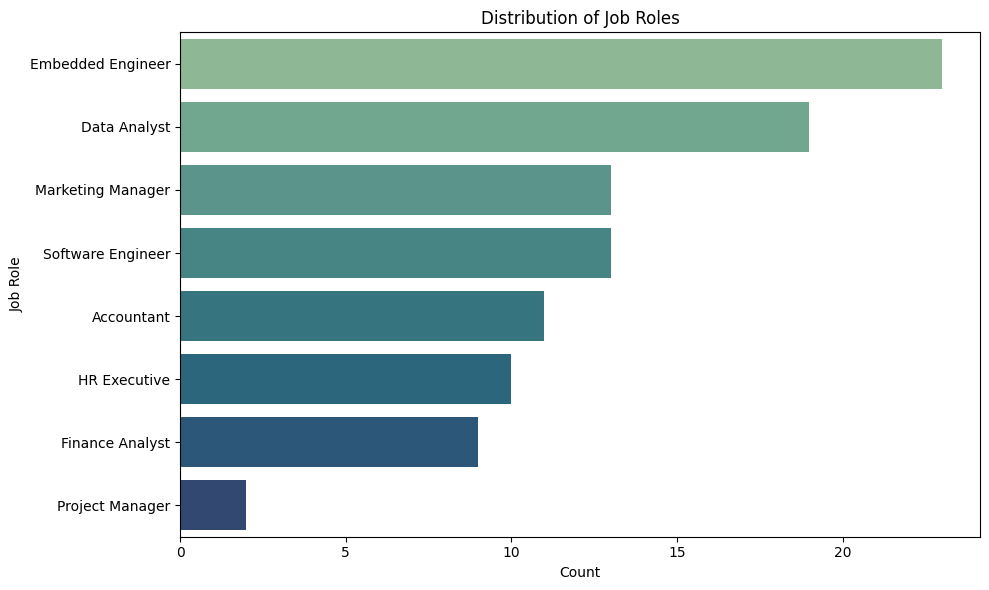

In [ ]:
# 1. Job Role Distribution
plt.figure(figsize=(10,6))

# The 'Preferred Job Role' column already exists, no need to create it from one-hot encoded columns
# job_role_cols = [col for col in data.columns if col.startswith('Preferred Job Role_')]
# Create a new column 'Preferred Job Role' containing the actual job role
# data['Preferred Job Role'] = data[job_role_cols].idxmax(axis=1).str.replace('Preferred Job Role_', '')

sns.countplot(y='Preferred Job Role', data=data, order=data['Preferred Job Role'].value_counts().index, palette='crest')
plt.title("Distribution of Job Roles")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3385411592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


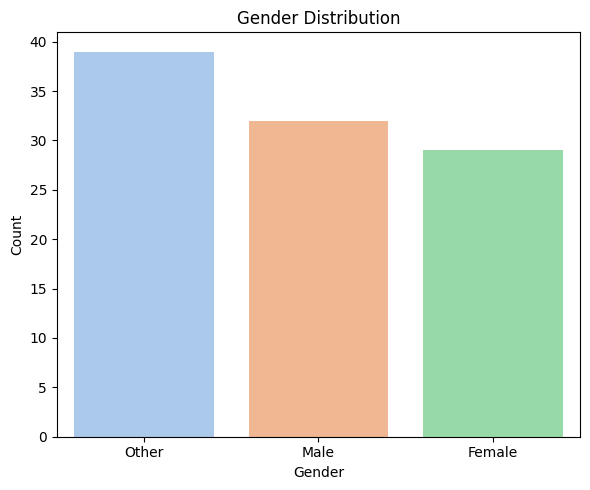

In [ ]:
# 2. Gender Distribution
plt.figure(figsize=(6,5))

# Count the occurrences of each gender in the 'Gender' column
gender_counts = data['Gender'].value_counts()

# Create a bar plot for gender distribution
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2507127013.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Highest Qualification', data=data, order=data['Highest Qualification'].value_counts().index, palette='viridis')


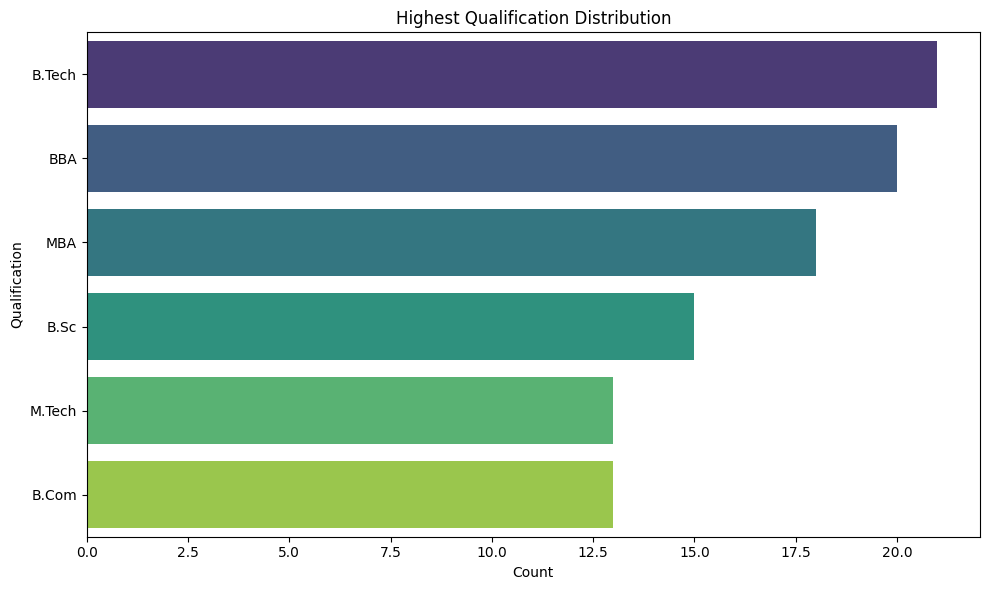

In [ ]:
# 3. Highest Qualification Distribution
plt.figure(figsize=(10,6))
# qualification_cols = [col for col in data.columns if col.startswith('Highest Qualification_')]
# data['Highest Qualification'] = data[qualification_cols].idxmax(axis=1).str.replace('Highest Qualification_', '')
sns.countplot(y='Highest Qualification', data=data, order=data['Highest Qualification'].value_counts().index, palette='viridis')
plt.title("Highest Qualification Distribution")
plt.xlabel("Count")
plt.ylabel("Qualification")
plt.tight_layout()
plt.show()

In [ ]:
# 4. Top 10 Majors / Specializations
if 'Major' in data.columns:
    top_majors = data['Major'].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_majors.values, y=top_majors.index, palette='mako')
    plt.title("Top 10 Majors / Specializations")
    plt.xlabel("Count")
    plt.ylabel("Major")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-429102107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exp_by_role.values, y=exp_by_role.index, palette='coolwarm')


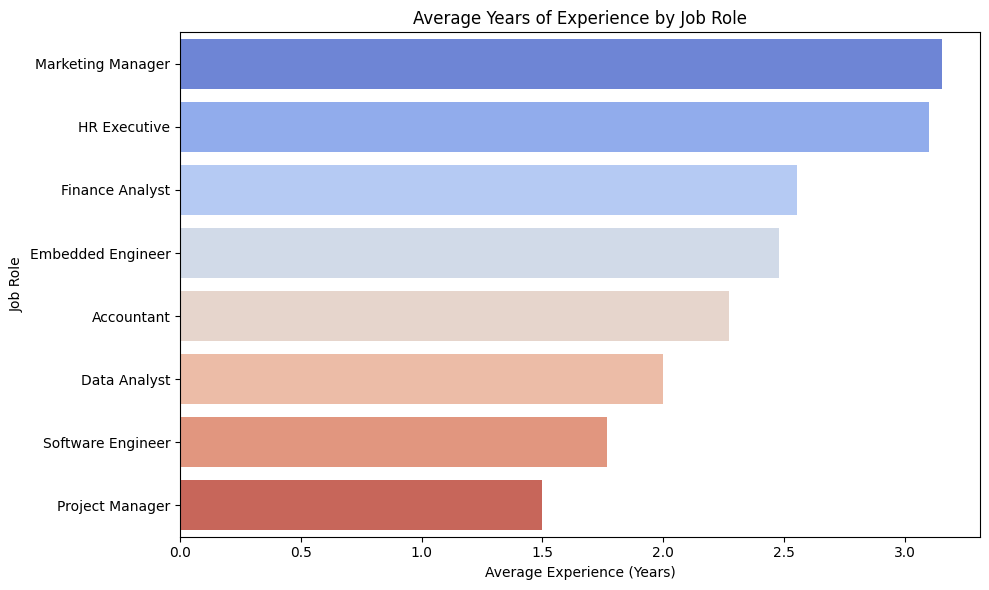

In [ ]:
# 5. Average Experience by Job Role
if 'Years of Experience' in data.columns:
    plt.figure(figsize=(10,6))
    exp_by_role = data.groupby('Preferred Job Role')['Years of Experience'].mean().sort_values(ascending=False)
    sns.barplot(x=exp_by_role.values, y=exp_by_role.index, palette='coolwarm')
    plt.title("Average Years of Experience by Job Role")
    plt.xlabel("Average Experience (Years)")
    plt.ylabel("Job Role")
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# **Define Features and Target Variable**

In [ ]:

target = 'Years of Experience'
features = data.drop(columns=[target])
y = data[target]


# **LabelEncoding**

In [ ]:
label_enc = LabelEncoder()
for col in features.select_dtypes(include='object').columns:
    features[col] = label_enc.fit_transform(features[col])


# **Data Scaling and Train-Test Split**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)


[[ 0.19053512 -1.33374581  0.74913148 -1.34386389 -1.58746404 -0.12170521
   1.06907119 -1.34544963  0.        ]
 [ 1.33374581 -0.39839161 -0.65111428  1.099525    0.2512974   1.31012075
  -0.97699807  0.79244703 -0.45360921]
 [-0.81410459  1.36838856  0.0490086  -1.34386389  1.47713835 -1.19557467
   0.55755387  0.3648677  -0.90721842]
 [-0.25982061 -1.19517482 -1.7012986  -0.12216944  0.2512974   1.31012075
  -0.46548076 -0.70408063 -0.45360921]
 [ 0.67553359 -1.12588932 -0.30105284 -0.12216944  0.86421787  0.23625128
   0.04603656  1.25565797  0.45360921]
 [-1.19517482 -0.32910611 -1.7012986   1.099525   -0.36162308  0.23625128
  -1.48851539 -1.73739735  0.45360921]
 [-0.32910611  0.64089084 -1.35123716 -1.34386389  1.47713835  1.66807724
   0.04603656 -0.73971224 -0.45360921]
 [ 1.6108878  -0.4676771  -0.65111428 -1.34386389  0.86421787 -0.4796617
   0.04603656 -1.48797607 -0.45360921]
 [-1.40303131 -0.08660687 -0.30105284 -1.34386389 -0.36162308 -1.19557467
  -0.46548076 -1.416712

# **LINEAR REGRESSION MODEL**

In [ ]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("----- Linear Regression -----")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


----- Linear Regression -----
R² Score: 0.03604451905483741
MSE: 2.9869064285349247


# **Machine Learning Models**



*  Logistic Regression
*  K-Nearest Neighbors (KNN)
*  Decision Tree
*  Support Vector Machine (SVM)
*  Random Forest
*  Boosting Techniques (XGBoost)


Each model includes training, prediction, and performance evaluation using accuracy, confusion matrix, and classification report.

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# **Logistic Regression**

Accuracy: 0.335

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.34      0.34        58
           1       0.42      0.63      0.50        99
           2       0.27      0.36      0.31        58
           3       0.36      0.15      0.22        52
           4       0.32      0.22      0.26        51
           5       0.20      0.15      0.17        82

    accuracy                           0.34       400
   macro avg       0.32      0.31      0.30       400
weighted avg       0.32      0.34      0.31       400



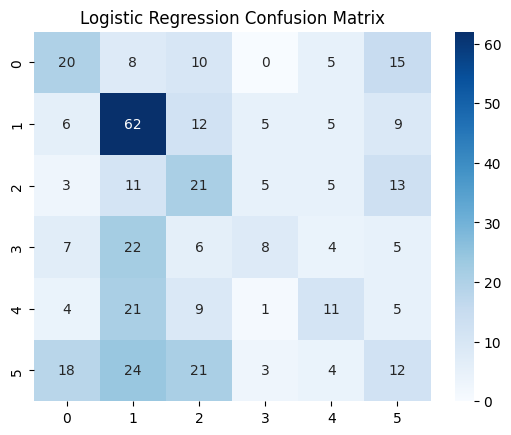

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# **K-Nearest Neighbors (KNN)**

Accuracy: 0.985

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        58
           3       1.00      0.90      0.95        52
           4       1.00      0.98      0.99        51
           5       0.94      1.00      0.97        82

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



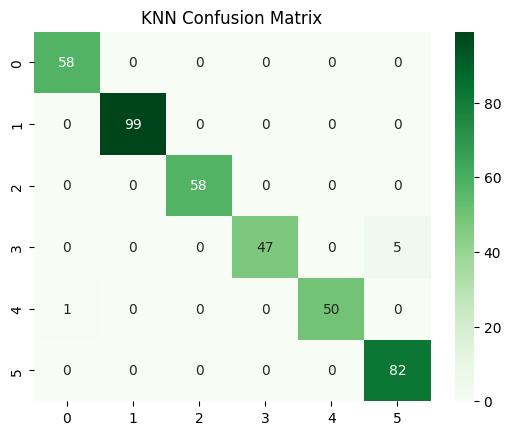

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.show()


# **Support Vector Machine (SVM)**

Accuracy: 0.9725

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        58
           3       1.00      0.88      0.94        52
           4       1.00      0.90      0.95        51
           5       0.93      1.00      0.96        82

    accuracy                           0.97       400
   macro avg       0.98      0.96      0.97       400
weighted avg       0.97      0.97      0.97       400



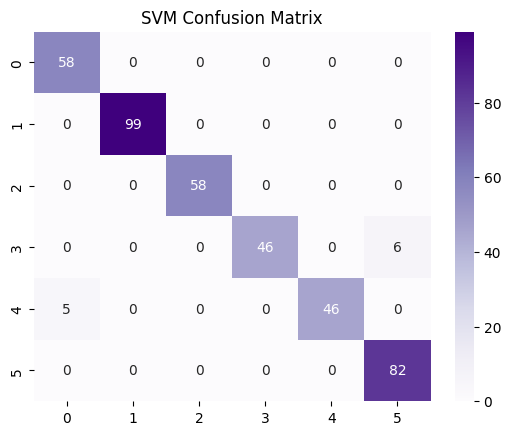

In [ ]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.show()


# **Random Forest Classifier**

Random Forest Accuracy: 0.785

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83        58
           1       0.62      0.95      0.75        99
           2       0.90      0.74      0.81        58
           3       1.00      0.73      0.84        52
           4       0.97      0.75      0.84        51
           5       0.77      0.67      0.72        82

    accuracy                           0.79       400
   macro avg       0.86      0.77      0.80       400
weighted avg       0.82      0.79      0.79       400



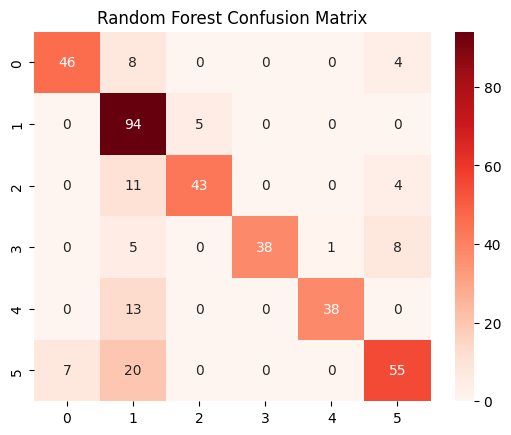

In [ ]:
rf = RandomForestClassifier(
    n_estimators=50,        # fewer trees (less stable)
    max_depth=4,            # shallower trees (less complex)
    min_samples_split=15,   # more samples needed to split
    min_samples_leaf=8,     # fewer leaf nodes
    max_features='log2',    # use fewer features per split
    bootstrap=True,
    random_state=42
)

# Train model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate performance
acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(acc, 4))  # Expect something like 0.82–0.88
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title("Random Forest Confusion Matrix")
plt.show()

# **XGBoost Classifier**

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:18:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.985

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        58
           3       1.00      0.88      0.94        52
           4       1.00      1.00      1.00        51
           5       0.93      1.00      0.96        82

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



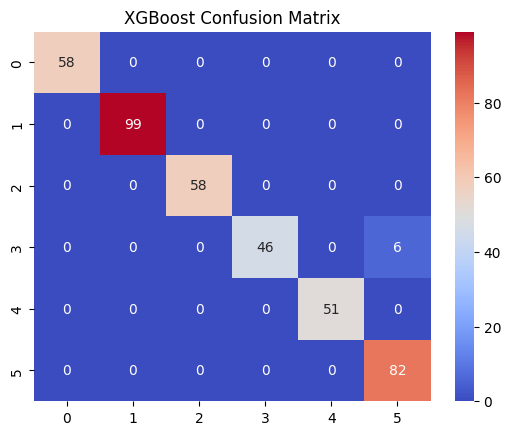

In [ ]:

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    learning_rate=0.05,     # smaller learning rate = slower learning
    max_depth=3,            # shallower trees = less complex
    n_estimators=80,        # fewer trees = less training
    subsample=0.6,          # use 60% of data per tree
    colsample_bytree=0.6,   # use 60% of features per tree
    reg_lambda=5,           # stronger L2 regularization
    reg_alpha=3             # stronger L1 regularization
)

# Train the model
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate performance
acc = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", round(acc, 4))  # Expected around 0.82–0.88
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='coolwarm')
plt.title("XGBoost Confusion Matrix")
plt.show()

# **Decision Tree Classifier**

Decision Tree Accuracy: 0.865

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78        58
           1       1.00      0.87      0.93        99
           2       0.89      0.84      0.87        58
           3       0.77      0.71      0.74        52
           4       0.95      0.71      0.81        51
           5       0.94      1.00      0.97        82

    accuracy                           0.86       400
   macro avg       0.87      0.85      0.85       400
weighted avg       0.89      0.86      0.87       400



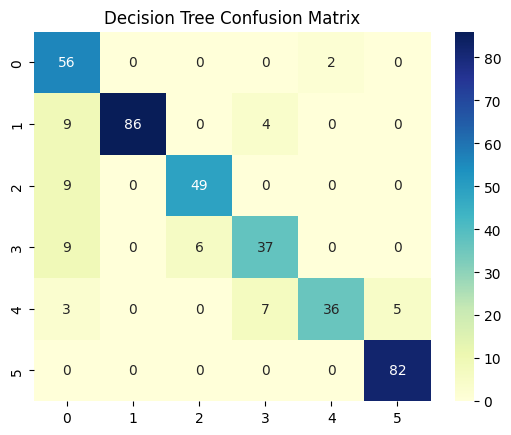

In [ ]:
dt = DecisionTreeClassifier(
    random_state=45,
    max_depth=6,           # limit depth of the tree
    min_samples_split=10,  # require at least 10 samples to split
    min_samples_leaf=5     # require at least 5 samples per leaf
)

# Train and predict
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# **Model Accuracy Comparison**
We will now compare the accuracies of all models using both individual and grouped bar charts.

In [ ]:
# Collect accuracies of all models
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

# Convert to DataFrame for easy plotting
acc_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])
acc_df

,Model,Accuracy
0,Logistic Regression,0.3350
1,KNN,0.9850
2,Decision Tree,0.8650
3,SVM,0.9725
4,Random Forest,0.7850
5,XGBoost,0.9850


# **Individual Bar**



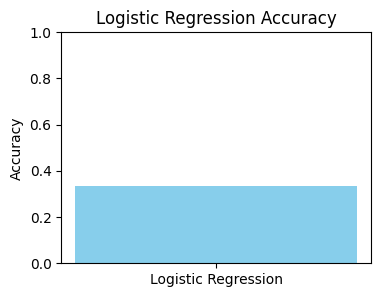

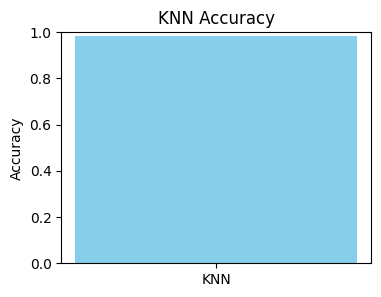

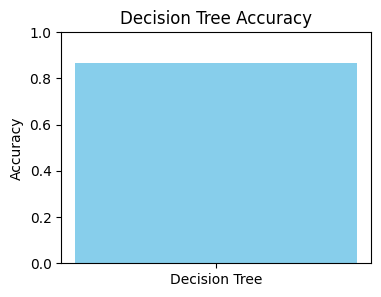

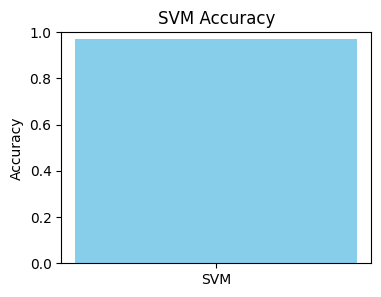

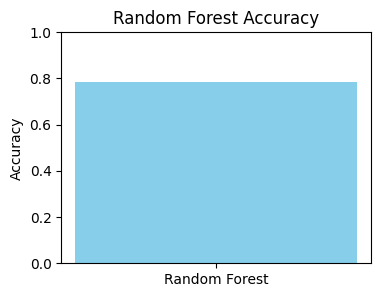

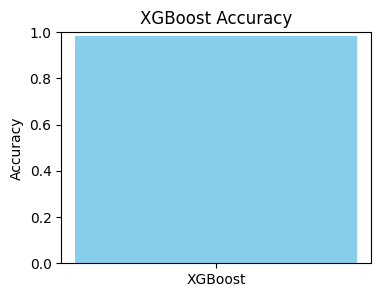

In [ ]:
for model, acc in model_accuracies.items():
    plt.figure(figsize=(4,3))
    plt.bar(model, acc, color='skyblue')
    plt.title(f"{model} Accuracy")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.show()

# **Combined Bar Chart (All Models)**



/tmp/ipython-input-1139092184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="viridis")


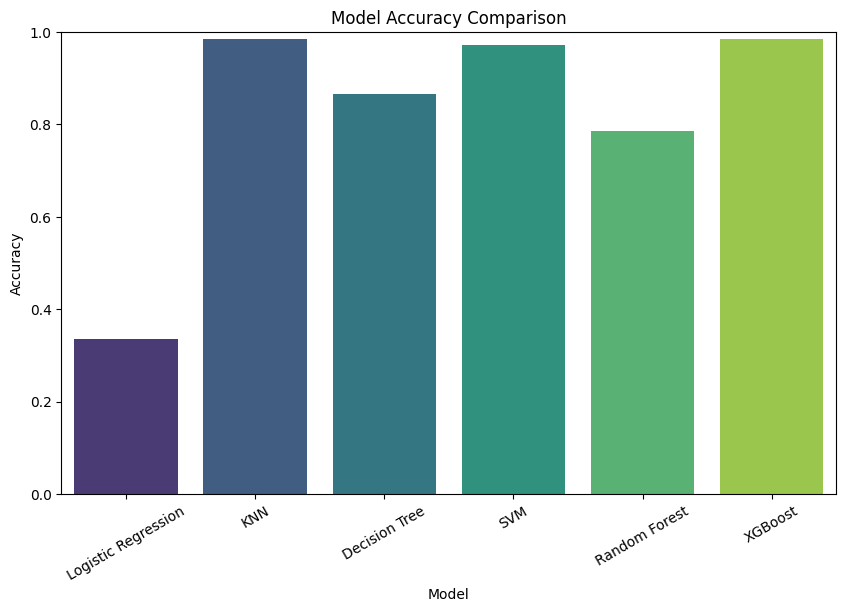

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()